<a href="https://colab.research.google.com/github/amudha1/Tensorflow/blob/master/2_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf

In [11]:
x_data = np.linspace(0,10,1000000)
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [0]:
noise = np.random.randn(len(y))


In [10]:
noise.shape

(1000000,)

Creating a imperfect line

In [14]:
y_true = (0.5 * x_data ) + 5 + noise
y_true

array([3.77762839, 6.28834767, 6.75405675, ..., 8.13685953, 9.97651542,
       9.88493068])

Creating DataFrames for easier handling of data

In [0]:
x_df = pd.DataFrame(data=x_data,columns=['X data'])

In [0]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [18]:
x_df.head()

,X data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [19]:
y_df.head()

,Y
0,3.777628
1,6.288348
2,6.754057
3,4.855930
4,4.323144


In [0]:
my_data = pd.concat([x_df,y_df],axis=1)

In [25]:
my_data.head()

,X data,Y
0,0.00000,3.777628
1,0.00001,6.288348
2,0.00002,6.754057
3,0.00003,4.855930
4,0.00004,4.323144


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


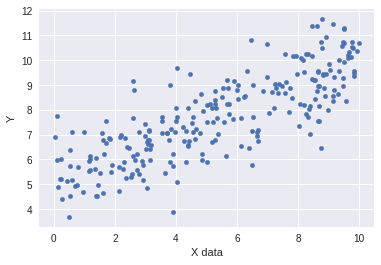

In [29]:
my_data.sample(n=250).plot(kind='scatter',x='X data',y='Y')

ITS DANGEROUS TO FEED IN ALL THE DATA POINTS TO THE NEURAL NETWORK AT ONCE.
HENCE THE CONCEPT OF BATCH

In [0]:
batch_size = 8

In [33]:
np.random.randn(2)

array([-0.56411013, -1.62244618])

In [34]:
m=tf.Variable(-0.56)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
b=tf.Variable(-1.622)

In [0]:
xph = tf.placeholder(tf.float32,[batch_size])

In [0]:
yph = tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model = m*xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [0]:
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        #selecting random index
        rand_ind = np.random.randint(0,len(x_data),batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m,model_b = sess.run([m,b])

In [51]:
model_m

0.5240718

In [52]:
model_b

4.838322